<a href="https://colab.research.google.com/github/tanaybag/GRIPMAY21_TASKS/blob/main/Task%206%3A%20Prediction%20using%20Decision%20Tree%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - GRIP**

## **Data Science & Business Analytics Intern - May'21**

### **Task 6: Prediction using Decision Tree Algorithm**

**AIM - Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.**

## Author: Tanay Bag

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

#### load data 

In [2]:
iris = pd.read_csv("/content/Iris.csv")
print("Data imported successfully")

Data imported successfully


#### Exploratory data analysis

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### PetalWidth has a minimum value of 0.1 and maximum of 2.5

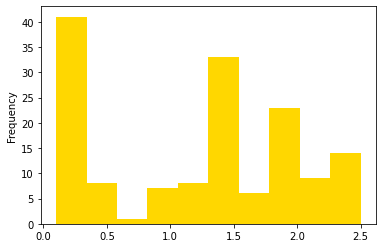

In [12]:
iris['PetalWidthCm'].plot.hist(color="gold")
plt.show()

In [10]:
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

#### Checking relation between columns

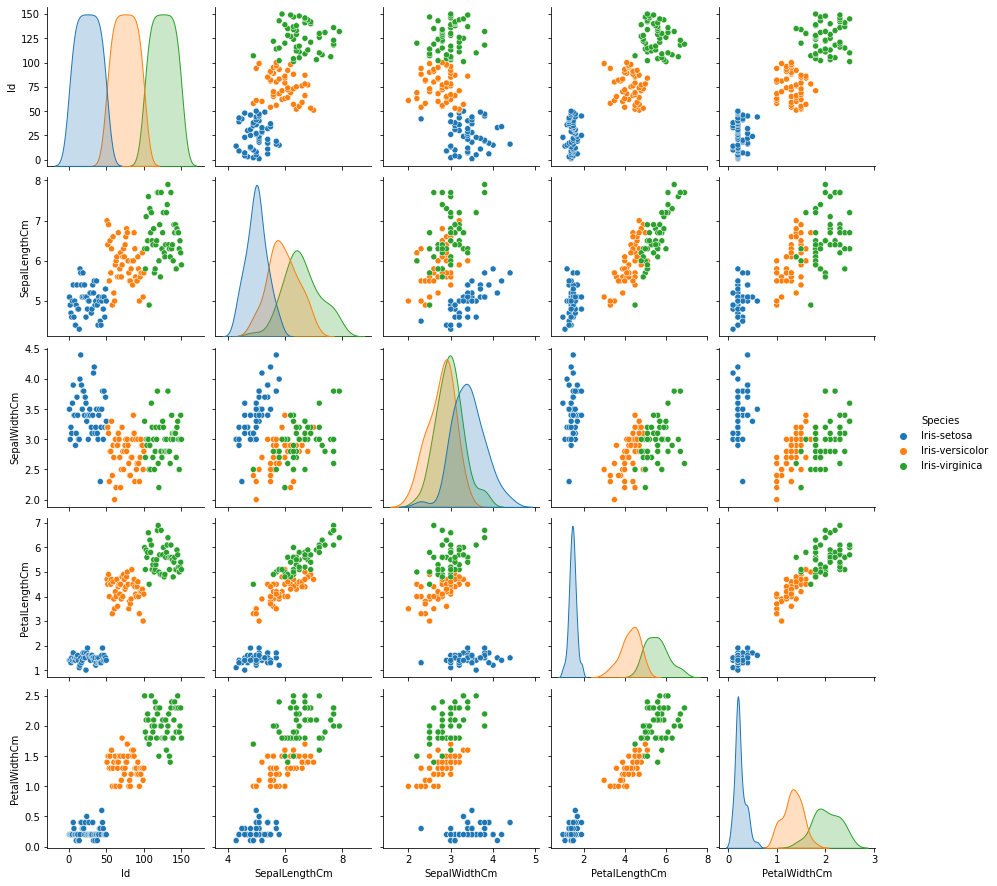

In [11]:
sns.pairplot(iris, hue='Species')

#### Iris-versicolor and Iris-virginica are overlapping whereas Iris-Settosa can be easily identified

In [13]:
#Data preparation
X = iris.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

##### Data visualization 

                     Id  SepalLengthCm  ...  PetalLengthCm  PetalWidthCm
Id             1.000000       0.716676  ...       0.882747      0.899759
SepalLengthCm  0.716676       1.000000  ...       0.871754      0.817954
SepalWidthCm  -0.397729      -0.109369  ...      -0.420516     -0.356544
PetalLengthCm  0.882747       0.871754  ...       1.000000      0.962757
PetalWidthCm   0.899759       0.817954  ...       0.962757      1.000000

[5 rows x 5 columns]


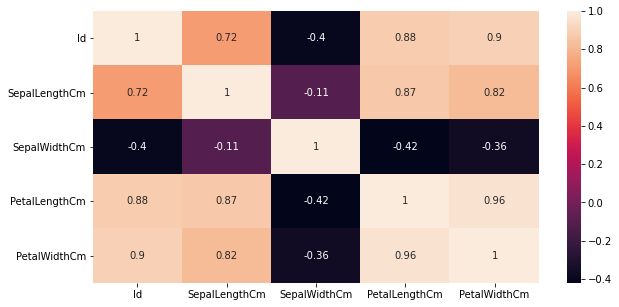

In [20]:
#use correalation for quantifying relation
plt.figure(figsize=(10,5))
print(iris.corr())
sns.heatmap(iris.corr(), annot=True)

##### PetalLength and PetalWidth have highest positive correlation

#### Train Decision Tree Model

In [21]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

In [22]:
#Training model
Dt = DecisionTreeClassifier(criterion = "entropy", random_state=0)
model = Dt.fit(X_train, y_train)
print("Training Completed")

Training Completed


In [23]:
#predict model
y_predict = Dt.predict(X_test)
print("The predicted values are:\n", y_predict)
print("\n The actual values are:\n",y_test.values.reshape(-1,45)[0])

The predicted values are:
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']

 The actual values are:
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolo

#### Visualization of decision tree

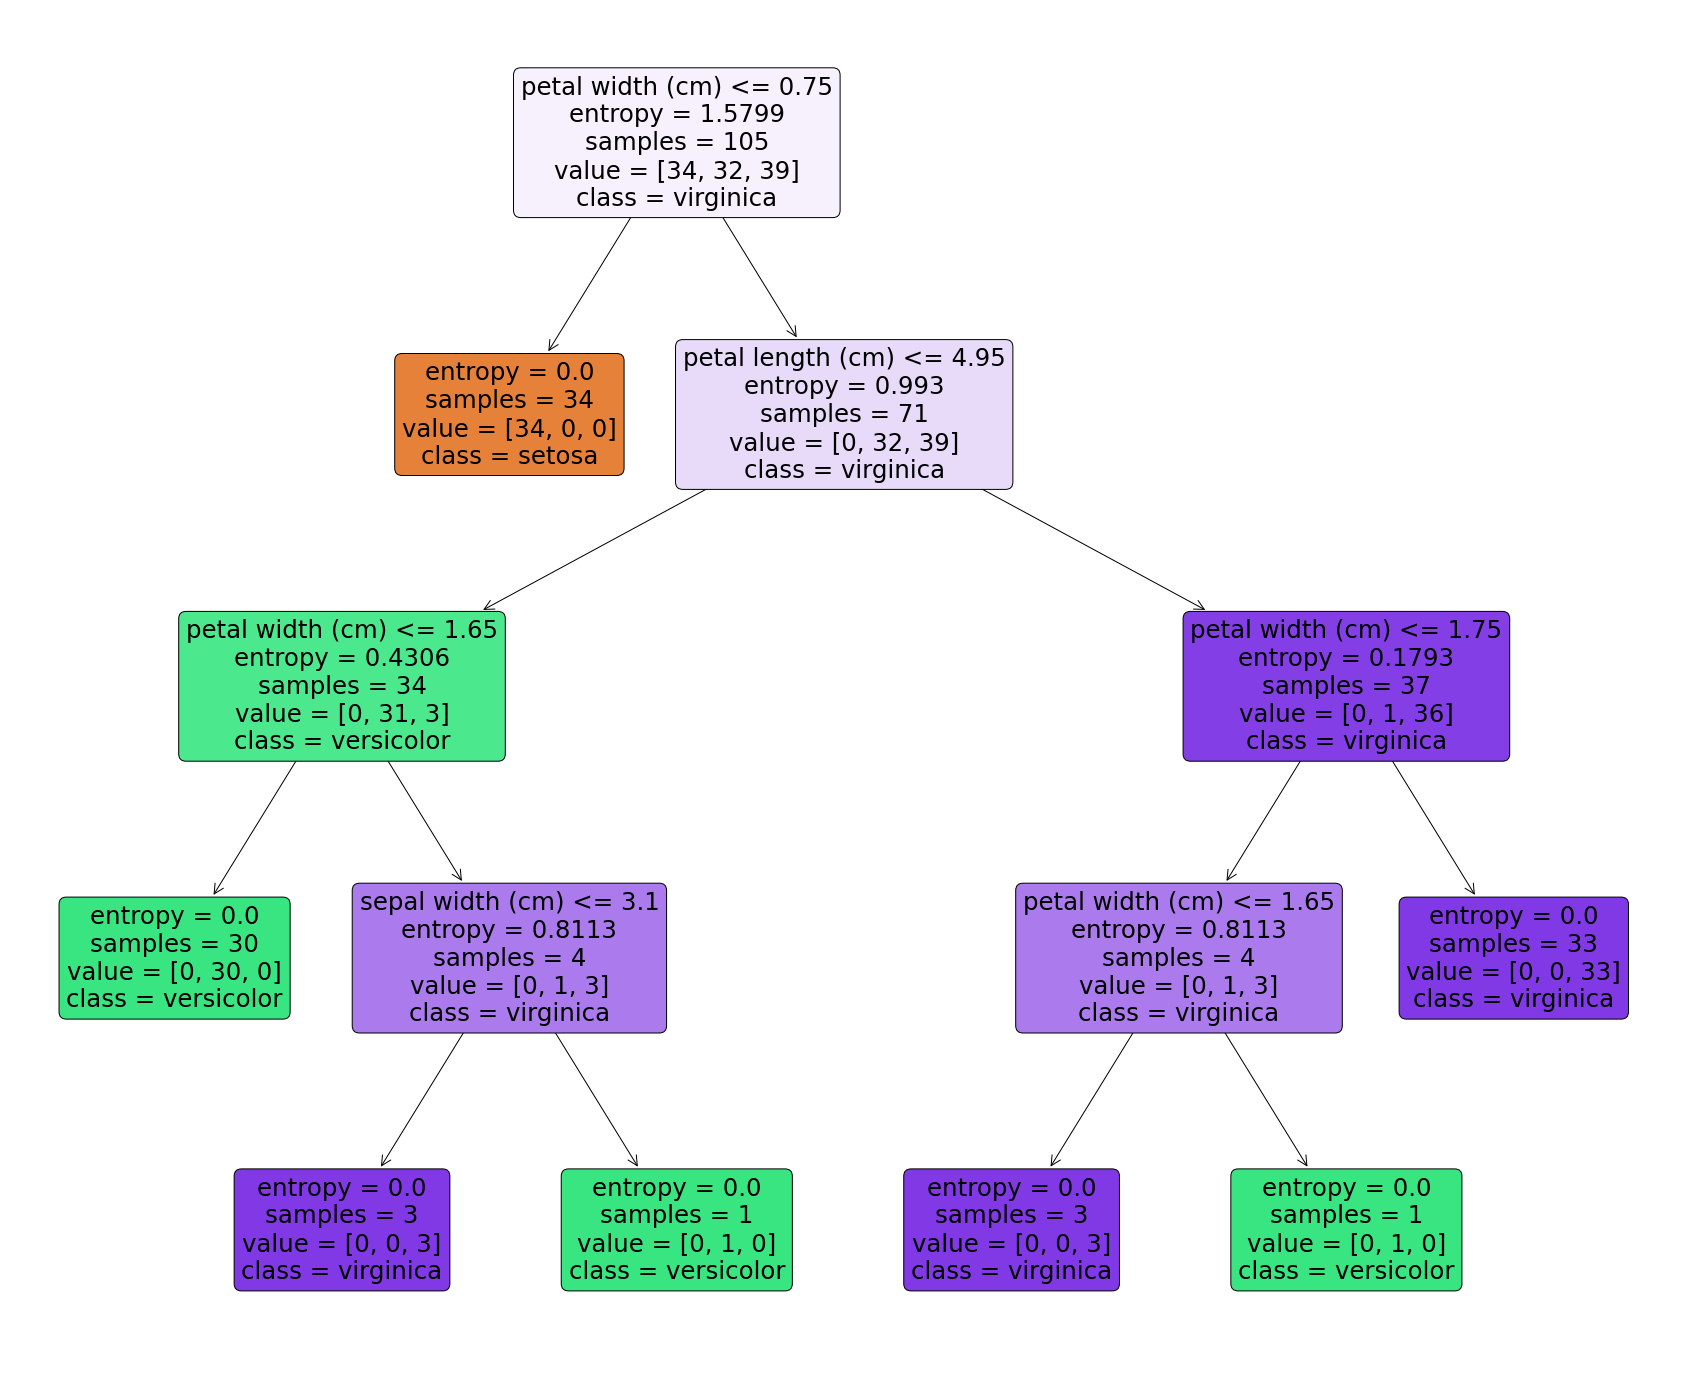

In [24]:
#using plot tree
fnames = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cnames = ['setosa','versicolor','virginica']
fig = plt.figure(figsize = (30,25))
tree.plot_tree(Dt,feature_names = fnames, class_names = cnames, filled = True, precision =4, rounded=True);

#### Model Evaluation

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



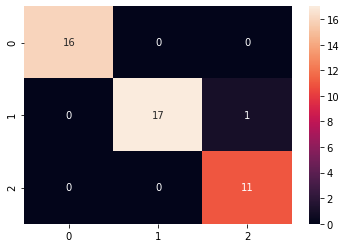

In [25]:
#evaluating performance
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot = True)

##### Precision, recall and  F1 score are more than 90% - model is fit and predicted with accuracy.